## Importing Necessary Libraries



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## Reading Dataset as CSV File

In [ ]:
dataframe = pd.read_csv('Iris.csv')
dataframe.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Observing the columns of the dataset

In [ ]:
dataframe.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

## Separating Features and Target Columns

In [ ]:
X_cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
Y_cols = ['Species']


## Identifying the unique class names

In [ ]:
classes = dataframe.Species.unique()
classes


array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
classes = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

## Replacing the classnames by numeric values

In [ ]:
dataframe.Species.replace(classes, [0,1,2], inplace = True)

##  Function to perform normalization of the data

In [ ]:
def normalize(x, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(x, order, axis))
    l2[l2 == 0] = 1
    return x / np.expand_dims(l2, axis)


##  Function to perform one-hot encoding of the target class

In [ ]:
def one_hot_encoding(y):
    n_cols = np.amax(y) + 1
    array = np.zeros((len(y), n_cols))
    for i in range(len(y)):
        array[i, y[i]] = 1
    return array


## Preprocessing Input Data

In [ ]:
X = pd.DataFrame(dataframe, columns=X_cols)
X = normalize(X.values)
X[:5]


array([[0.80377277, 0.55160877, 0.22064351, 0.0315205 ],
       [0.82813287, 0.50702013, 0.23660939, 0.03380134],
       [0.80533308, 0.54831188, 0.2227517 , 0.03426949],
       [0.80003025, 0.53915082, 0.26087943, 0.03478392],
       [0.790965  , 0.5694948 , 0.2214702 , 0.0316386 ]])

## Preprocessing Target Data

In [ ]:
Y = pd.DataFrame(dataframe, columns=Y_cols)
Y = Y.values
Y = Y.flatten()
Y = one_hot_encoding(Y)
Y[:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

## Activation Function and its derivative

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))


## Function for weight initialization

In [ ]:
def init_weight(ins, outs):
    return np.random.random((ins,outs))

## Loss and Accuracy Function

In [ ]:
def loss_fn(y, y_hat):
    mse = np.mean(np.square(y - y_hat))
    return mse

def accuracy(e):
    return (1 - e) * 100

## Function to plot results

In [ ]:
def plot(data, type):
    plt.figure()
    plt.plot(data)
    plt.xlabel('Epochs')
    plt.ylabel(type)
    plt.grid(True)
    plt.show()


## MLP with 2 Hidden layers with 30 and 50 nodes respectively 

In [ ]:
def train_mlp(X, Y, epochs=1000, lr=0.1):
    w0, w1, w2 = init_weight(len(X[0]), 30), init_weight(30, 50), init_weight(50, len(Y[0])),
    errors, accuracies = [], []
    for epoch in range(epochs):

        l0 = X
        l1 = sigmoid(np.dot(l0, w0))
        l2 = sigmoid(np.dot(l1, w1))
        l3 = sigmoid(np.dot(l2, w2))

        l3_error = Y - l3
        l3_delta = l3_error * sigmoid_derivative(l3)

        l2_error = l3_delta.dot(w2.T)
        l2_delta = l2_error * sigmoid_derivative(l2)

        l1_error = l2_delta.dot(w1.T)
        l1_delta = l1_error * sigmoid_derivative(l1)
        w2 += l2.T.dot(l3_delta) * lr
        w1 += l1.T.dot(l2_delta) * lr
        w0 += l0.T.dot(l1_delta) * lr
        e = loss_fn(Y, l3)
        errors.append(e)
        acc = (1 - e) * 100
        accuracies.append(acc)
        if (epoch+1) % 1000 == 0:
            print(f"Epoch {epoch+1}/{epochs}: Loss = {e} =====  Accuracy = {acc}")

    print(f"\n\nFinal Accuracy = {accuracies[-1]}\nMax Accuracy = {max(accuracies)}\n\n\n")
    return errors, accuracies

## Training the network

In [ ]:
loss, accuracy = train_mlp(X, Y, epochs=10000, lr=0.01)

Epoch 1000/10000: Loss = 0.07586087809629652 =====  Accuracy = 92.41391219037035
Epoch 2000/10000: Loss = 0.0415745193262759 =====  Accuracy = 95.84254806737242
Epoch 3000/10000: Loss = 0.04258196890508713 =====  Accuracy = 95.74180310949129
Epoch 4000/10000: Loss = 0.018894930666841236 =====  Accuracy = 98.11050693331588
Epoch 5000/10000: Loss = 0.01607755562225589 =====  Accuracy = 98.39224443777441
Epoch 6000/10000: Loss = 0.01527642312267712 =====  Accuracy = 98.4723576877323
Epoch 7000/10000: Loss = 0.014911120486523015 =====  Accuracy = 98.5088879513477
Epoch 8000/10000: Loss = 0.014686173536691511 =====  Accuracy = 98.53138264633084
Epoch 9000/10000: Loss = 0.014520817106683926 =====  Accuracy = 98.5479182893316
Epoch 10000/10000: Loss = 0.014388038056679844 =====  Accuracy = 98.56119619433201


Final Accuracy = 98.56119619433201
Max Accuracy = 98.56119619433201





## Plotting Loss 

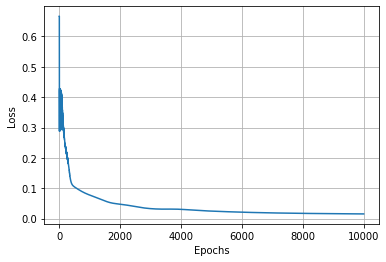

In [ ]:
plot(loss,'Loss')

## Plotting Accuracy 

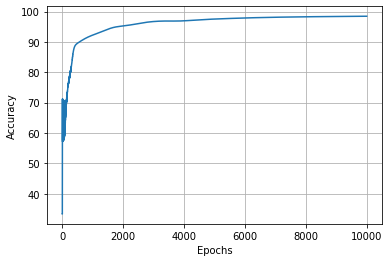

In [ ]:
plot(accuracy,'Accuracy')